# Splinart on a circle

In this tutorial, we will see how to use splinart with a circle. 

First of all, we have to create a circle.

In [50]:
using Splinart

center = [.5, .5]
radius = .3
theta, path = circle(center, radius)

([0.0, 0.1282282715750936, 0.2564565431501872, 0.38468481472528077, 0.5129130863003744, 0.641141357875468, 0.7693696294505615, 0.8975979010256552, 1.0258261726007487, 1.1540544441758425  …  5.129130863003744, 5.257359134578838, 5.385587406153931, 5.513815677729024, 5.642043949304118, 5.770272220879212, 5.898500492454306, 6.026728764029399, 6.154957035604492, 6.283185307179586], [0.8 0.7975370041469738 … 0.7975370041469738 0.8; 0.5 0.5383631485053518 … 0.461636851494648 0.49999999999999994])

In the previous code, we create a discretization of a circle centered in $[0.5, 0.5]$ with a radius of $0.3$. We don't specify the number of discretization points. The default is 30 points.

We can plot the points using matplotlib.

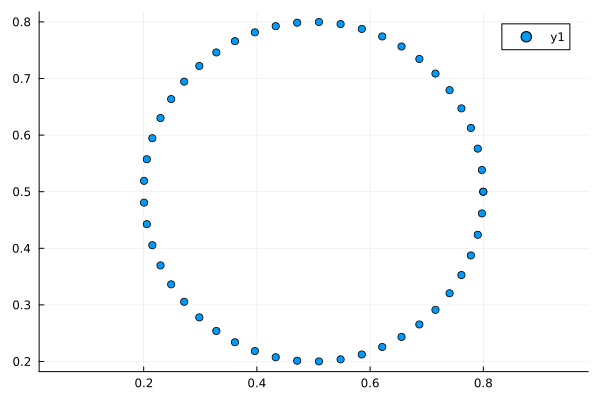

In [51]:
import Plots

Plots.scatter(path[1, :], path[2, :], aspect_ratio = 1)

## The sample

In order to compute a sample on a given cubic spline equation, we need to provide a Python function that gives us the x coordinates. We can choose for example.

In [52]:
using Random

function x_func()
    nsamples = 500
    return mod2pi.(rand() .+ 2pi .* LinRange(0, 1, nsamples))
end

x_func (generic function with 1 method)

We can see that the points are chosen between $[0, 2\pi]$ in a random fashion.

## The cubic spline

Given a path, we can apply the spline function in order to compute the second derivative of this cubic spline.

In [53]:
yder2 = spline(theta, path)

2×50 Matrix{Float64}:
 0.0  -0.37844    -0.269018   -0.284236  …  -0.269018   -0.37844    0.0
 0.0  -0.0384157  -0.0762007  -0.112734      0.0762007   0.0384157  0.0

And apply the equation to the sample

In [54]:
xsample = x_func()
ysample = zeros(2, length(xsample))
splint(theta, path, yder2, xsample, ysample)

which gives

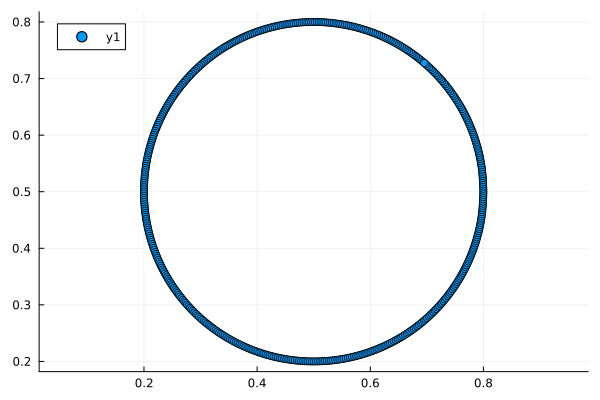

In [55]:
Plots.scatter(ysample[1, :], ysample[2, :], aspect_ratio=1)

We can see the sample is well defined around the circle that we defined previously.

Now, assume that we move randomly the points of the circle with a small distance.

In [56]:
update_path(path, scale_value=.001, periodic=true)

2-element view(::Matrix{Float64}, :, 50) with eltype Float64:
 0.8
 0.5

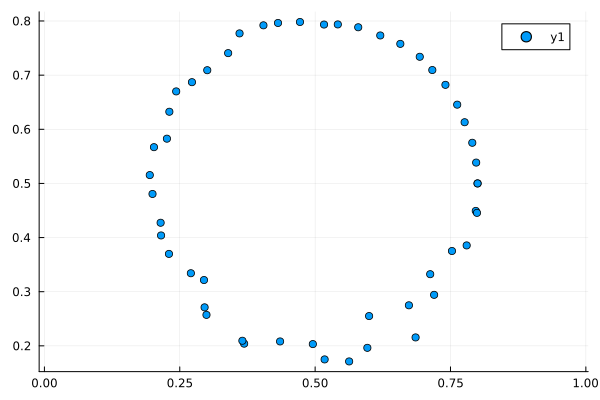

In [57]:
Plots.scatter(path[1, :], path[2, :], aspect_ratio=1)

And we compute again the sample of the new cubic spline equation.

In [61]:
yder2 = spline(theta, path)
splint(theta, path, yder2, xsample, ysample)

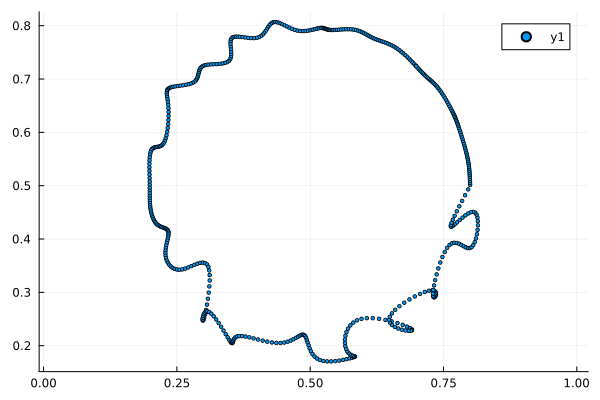

In [62]:
Plots.scatter(ysample[1, :], ysample[2, :], ms = 2, aspect_ratio=1)

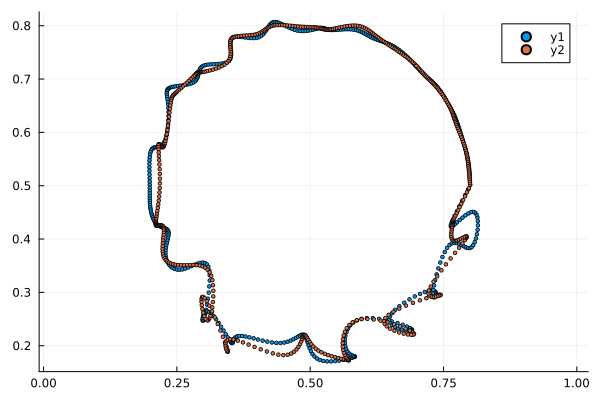

In [63]:
update_path(path, scale_value=.001, periodic=true)
yder2 = spline(theta, path)
splint(theta, path, yder2, xsample, ysample)
Plots.scatter!(ysample[1, :], ysample[2, :], ms = 2, aspect_ratio=1)

The circle is deformed.

This is exactly how works splinart. We give a shape and at each step

- we perturb the points of this shape
- we compute a sample an this new cubic spline equation
- we add the pixel with a given color on the output image

And we do that several time. We can have the following result

img_size, channels = 1000, 4
img = np.ones((img_size, img_size, channels), dtype=np.float32)

theta, path = spl.circle(center, radius)
spl.update_img(img, path, x_func, nrep=4000, x=theta, scale_value=.00005)

In [11]:
using Colors, Images

[ Info: Precompiling FileIOExt [f5f51d8f-5827-5d2e-939b-192fcd6ec70c]


In [96]:
xspline = x_func()
yspline = zeros((2, length(xspline)))
nrep = 1000
img_size = 400
pixels = zeros(Int, (img_size, img_size))
image = zeros(UInt8, (img_size, img_size))
theta, path = circle(center, radius)
for i in 1:nrep
    yder2 = spline(theta, path)
    splint(theta, path, yder2, xspline, yspline)
    for (xs,ys) in eachcol(yspline)
        is = ceil(Int, xs * img_size)
        js = ceil(Int, ys * img_size)
        pixels[is, js] += 1
    end
    update_path(path, scale_value=0.0001, periodic=true)
end

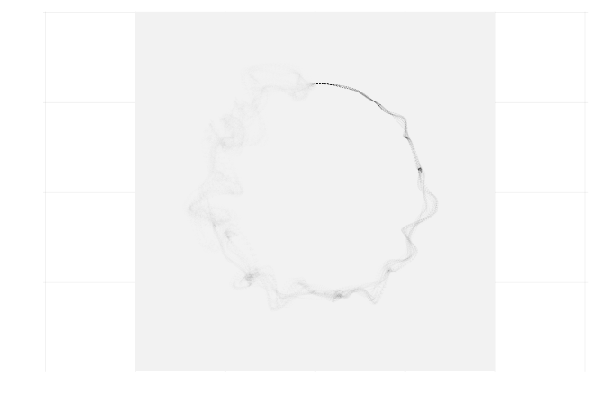

In [97]:
Plots.heatmap(pixels, c = Plots.cgrad(:grays, rev=true), aspect_ratio=1, legend = false, showaxis = false)